In [37]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,train_test_split,learning_curve
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
#read the data
hour_df=pd.read_csv("F:/MyLife/9. DataSets-20190613T131859Z-001/9. DataSets/Bike-Sharing-Dataset/hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [4]:
#know structure
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
#know missing values
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [40]:
#remove unnecessary column
hour_df.drop('instant',axis=1,inplace=True)
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Text(0, 0.5, 'counts')

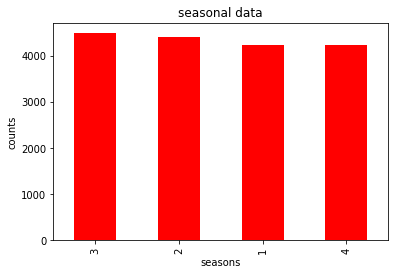

In [41]:
#bar plot to know the counts of the individual seasons
pd.value_counts(hour_df['season']).plot.bar(color = 'r')
plt.title('seasonal data')
plt.xlabel('seasons')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

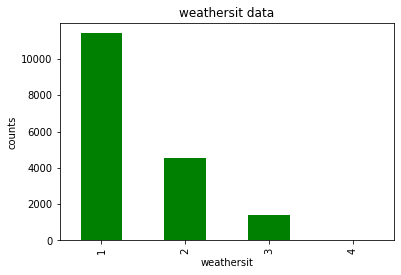

In [42]:
#bar plot to know the counts of the individual weather condition
pd.value_counts(hour_df['weathersit']).plot.bar(color = 'g')
plt.title('weathersit data')
plt.xlabel('weathersit')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

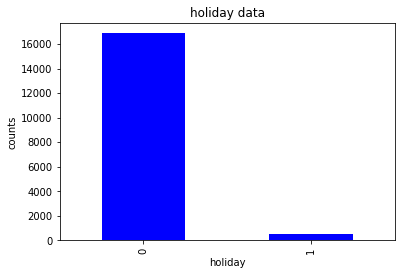

In [43]:
#bar plot to know the counts of the individual holiday or non holiday
pd.value_counts(hour_df['holiday']).plot.bar(color = 'b')
plt.title('holiday data')
plt.xlabel('holiday')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

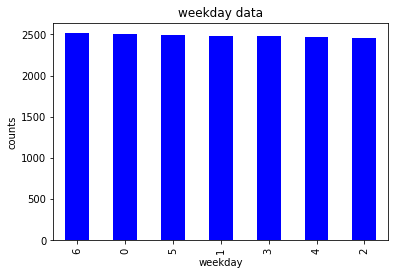

In [44]:
#bar plot to know the counts and data distribution for weekday
pd.value_counts(hour_df['weekday']).plot.bar(color = 'b')
plt.title('weekday data')
plt.xlabel('weekday')
plt.ylabel('counts')

In [45]:
#know basic statistic details
hour_df.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


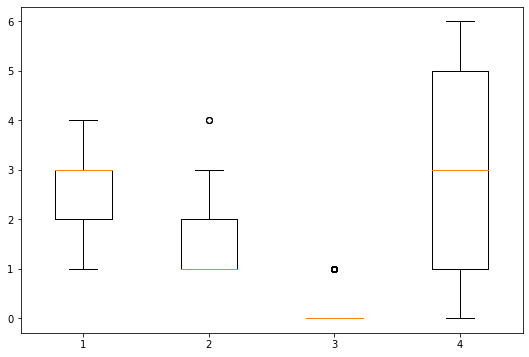

In [46]:
#visualize the dataset
fig = plt.figure(1,figsize=(9,6))
ax = fig.add_subplot("111")
bp = ax.boxplot([hour_df['season'],hour_df['weathersit'],hour_df['holiday'],hour_df['weekday']])
fig.savefig('fig1.png', bbox_inches='tight')

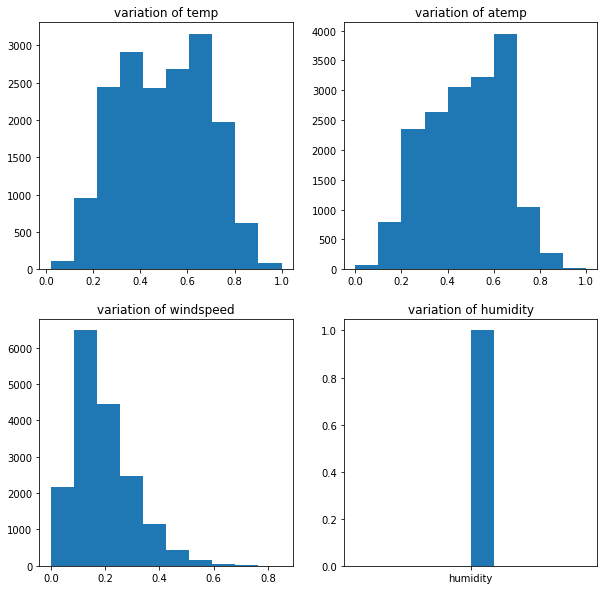

In [47]:
#histogram for continuous variable
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x='temp',data=hour_df)
axes[0,0].set_title('variation of temp')
axes[0,1].hist(x='atemp',data=hour_df)
axes[0,1].set_title('variation of atemp')
axes[1,0].hist(x='windspeed',data=hour_df)
axes[1,0].set_title('variation of windspeed')
axes[1,1].hist(x='humidity',data=hour_df)
axes[1,1].set_title('variation of humidity')
fig.set_size_inches(10,10)

In [49]:
y=hour_df['cnt']
hour_df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [51]:
corr_matrix = hour_df.corr().abs()
corr_matrix

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,0.010742,0.830386,0.006117,0.009585,0.002335,0.013743,0.014524,0.312025,0.319380,0.150625,0.149773,0.120206,0.174226,0.178056
yr,0.010742,1.000000,0.010473,0.003867,0.006692,0.004485,0.002196,0.019157,0.040913,0.039222,0.083546,0.008740,0.142779,0.253684,0.250495
mnth,0.830386,0.010473,1.000000,0.005772,0.018430,0.010400,0.003477,0.005400,0.201691,0.208096,0.164411,0.135386,0.068457,0.122273,0.120638
hr,0.006117,0.003867,0.005772,1.000000,0.000479,0.003498,0.002285,0.020203,0.137603,0.133750,0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.009585,0.006692,0.018430,0.000479,1.000000,0.102088,0.252471,0.017036,0.027340,0.030973,0.010588,0.003988,0.031564,0.047345,0.030927
weekday,0.002335,0.004485,0.010400,0.003498,0.102088,1.000000,0.035955,0.003311,0.001795,0.008821,0.037158,0.011502,0.032721,0.021578,0.026900
workingday,0.013743,0.002196,0.003477,0.002285,0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,0.011830,0.300942,0.134326,0.030284
weathersit,0.014524,0.019157,0.005400,0.020203,0.017036,0.003311,0.044672,1.000000,0.102640,0.105563,0.418130,0.026226,0.152628,0.120966,0.142426
temp,0.312025,0.040913,0.201691,0.137603,0.027340,0.001795,0.055390,0.102640,1.000000,0.987672,0.069881,0.023125,0.459616,0.335361,0.404772
atemp,0.319380,0.039222,0.208096,0.133750,0.030973,0.008821,0.054667,0.105563,0.987672,1.000000,0.051918,0.062336,0.454080,0.332559,0.400929


In [52]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
to_drop

['mnth', 'atemp', 'registered', 'cnt']

In [53]:
hour_df = hour_df.drop(hour_df[to_drop], axis=1)

In [55]:
X =hour_df.drop(['dteday'], axis=1) 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=1)

In [56]:
models=[LinearRegression(),Ridge(),RidgeCV(),Lasso(),LassoCV(),SVR(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),GradientBoostingRegressor()]
model_names=['LinearRegression','Ridge','RidgeCV','Lasso','LassoCV','SVR','KNeighborsRegressor','RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','GradientBoostingRegressor']

In [57]:
rmsle=[]
mse = []
mae = []
score = []
d={}

In [59]:
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    test_pred=clf.predict(X_test)
    #if not ((y_test >= 0).all() and (test_pred >= 0).all()):
    #rmsle.append(mean_squared_log_error(y_test,test_pred))
    rmsle.append(np.sqrt(np.mean(np.power(np.log(np.array(y_test)+1) - np.log(np.array(test_pred)+1), 2))))
    mae.append(mean_absolute_error(y_test,test_pred))
    mse.append(mean_squared_error(y_test,test_pred))
    score.append(r2_score(y_test,test_pred)*100)

In [60]:
d={'Modelling Algorithm':model_names,'RMSLE':rmsle,'MAE':mae,'MSE':mse,'r2score':score}   
d

{'Modelling Algorithm': ['LinearRegression',
  'Ridge',
  'RidgeCV',
  'Lasso',
  'LassoCV',
  'SVR',
  'KNeighborsRegressor',
  'RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'GradientBoostingRegressor'],
 'RMSLE': [nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  0.3850382855154223,
  0.30778863461731293,
  1.0582195756002253,
  0.30567720336848,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  0.3850382855154223,
  0.30267844232042884,
  1.0857206530555807,
  0.30751144912703765,
  nan],
 'MAE': [80.9439923330268,
  80.9403839672728,
  80.90831722386332,
  80.79392221220968,
  80.17283510309763,
  92.77467534197224,
  42.11752114621094,
  23.86633868461937,
  76.5753948547556,
  23.698601760745728,
  36.82049025894086,
  80.9439923330268,
  80.9403839672728,
  80.90831722386332,
  80.79392221220968,
  80.17283510309763,
  92.77467534197224,
  42.11752114621094,
  23.524909373381664,
  78.35197291078802,
  23.624598653547388,
  36.8174680276838],
 'MSE': [13434.67

In [ ]:
rmsle_frame = pd.DataFrame(d)
rmsle_frame

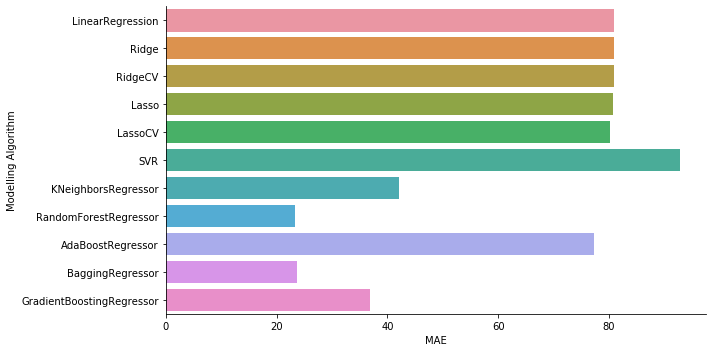

In [62]:
sns.factorplot(y='Modelling Algorithm',x='MAE',data=rmsle_frame[:],kind='bar',size=5,aspect=2)

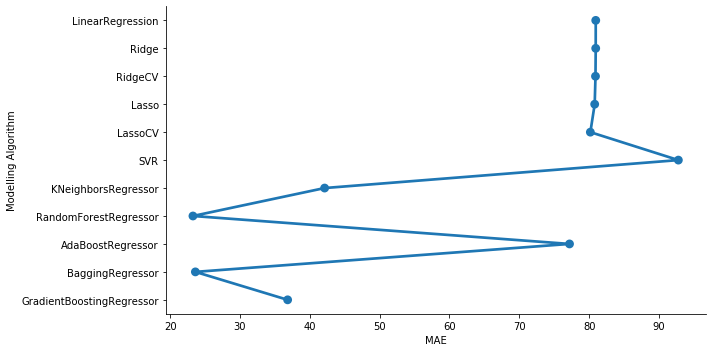

In [25]:
sns.factorplot(y='Modelling Algorithm',x='MAE',data=rmsle_frame[:],kind='point',size=5,aspect=2)

In [ ]:
no_of_estimators = [1000]
params_dict = {'n_estimators':no_of_estimators,'n_jobs':[-1],'max_features':['auto','sqrt','log2']}
randomRegressor = GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,cv=7)
randomRegressor.fit(X_train,y_train)
pred = randomRegressor.predict(X_test)
print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred)*100)

In [27]:
#Adaboost
no_of_estimators = [50,100,150]
params_dict = {'n_estimators':no_of_estimators,'loss':['linear','square','exponential'],'learning_rate':[0.1,1,10]}
adaBoostRegressor = GridSearchCV(estimator=AdaBoostRegressor(),param_grid=params_dict,cv=7)
adaBoostRegressor.fit(X_train,y_train)
pred = adaBoostRegressor.predict(X_test)
print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred)*100)
print(adaBoostRegressor.best_estimator_,adaBoostRegressor.best_params_)

71.69358799880472
78.04569084796199
AdaBoostRegressor(base_estimator=None, learning_rate=1, loss='square',
                  n_estimators=50, random_state=None) {'learning_rate': 1, 'loss': 'square', 'n_estimators': 50}


In [ ]:
# for KNN
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
n_neighbors
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
knnRegressor=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,cv=7)
knnRegressor.fit(X_train,y_train)
pred=knnRegressor.predict(X_test)
print((np.sqrt(mean_absolute_error(y_test,pred))))
print(r2_score(y_test,pred)*100)
print(knnRegressor.best_estimator_,knnRegressor.best_params_)

In [29]:
#Bagging
no_of_estimators = [100]
params_dict = {'n_estimators':no_of_estimators,'n_jobs':[-1]}
baggingRegressor = GridSearchCV(estimator=BaggingRegressor(),param_grid=params_dict,cv=7)
baggingRegressor.fit(X_train,y_train)
pred = baggingRegressor.predict(X_test)
print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred)*100)
print(baggingRegressor.best_estimator_,baggingRegressor.best_params_)

22.4291196271362
95.90945675674277
BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=100, n_jobs=-1,
                 oob_score=False, random_state=None, verbose=0,
                 warm_start=False) {'n_estimators': 100, 'n_jobs': -1}


In [ ]:
#Gradient
no_of_estimators = [50,100,150]
params_dict = {'n_estimators':no_of_estimators,'loss':['ls','lad','huber','quantile'],'learning_rate':[0.01,0.1,1,10]}
gradientRegressor = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=params_dict,cv=7)
gradientRegressor.fit(X_train,y_train)
pred = gradientRegressor.predict(X_test)
print(mean_absolute_error(y_test,pred))
print(r2_score(y_test,pred)*100)
print(gradientRegressor.best_estimator_,gradientRegressor.best_params_)

In [31]:
def plot_learningCurve(regressor,x,y,train_sizes,cv,verbose):
    train_sizes,train_score,validation_score = learning_curve(regressor,x,y,train_sizes=train_sizes,cv=cv,verbose=verbose)
    train_mean = np.mean(train_score,axis=1)
    train_std = np.std(train_score,axis=1)
    test_mean = np.mean(validation_score,axis=1)
    test_std = np.std(validation_score,axis=1)
    
    plt.plot(train_sizes,train_mean,label='train score')
    plt.plot(train_sizes,test_mean,label='validation score')
    plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std,color='#DDDDDD')
    plt.fill_between(train_sizes,test_mean-train_std,train_mean+train_std,color='#DDDDDD')
    
    plt.xlabel('Train sizes')
    plt.ylabel('validation scores')
    plt.title('Learning curve for training and testing')
    plt.show()

[learning_curve] Training set sizes: [  99  241  384  526  669  811  954 1096 1239 1381 1524 1666 1808 1951
 2093 2236 2378 2521 2663 2806 2948 3091 3233 3376 3518 3661 3803 3946
 4088 4231 4373 4515 4658 4800 4943 5085 5228 5370 5513 5655 5798 5940
 6083 6225 6368 6510 6653 6795 6938 7080 7222 7365 7507 7650 7792 7935
 8077 8220 8362 8505 8647 8790 8932 9075 9217 9360 9502 9645 9787 9930]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed:  2.9min finished


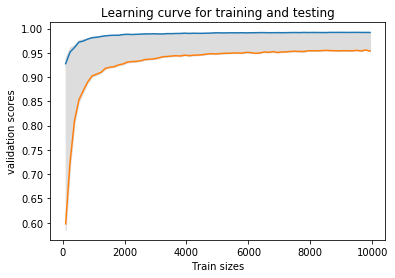

In [32]:
plot_learningCurve(RandomForestRegressor(),X_train,y_train,train_sizes=np.linspace(0.01,1,70),cv=7,verbose=1)

[learning_curve] Training set sizes: [  99  241  384  526  669  811  954 1096 1239 1381 1524 1666 1808 1951
 2093 2236 2378 2521 2663 2806 2948 3091 3233 3376 3518 3661 3803 3946
 4088 4231 4373 4515 4658 4800 4943 5085 5228 5370 5513 5655 5798 5940
 6083 6225 6368 6510 6653 6795 6938 7080 7222 7365 7507 7650 7792 7935
 8077 8220 8362 8505 8647 8790 8932 9075 9217 9360 9502 9645 9787 9930]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed:  5.1min finished


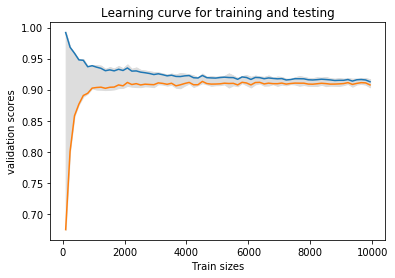

In [33]:
plot_learningCurve(GradientBoostingRegressor(),X_train,y_train,train_sizes=np.linspace(0.01,1,70),cv=7,verbose=1)

[learning_curve] Training set sizes: [  99  138  178  217  257  296  336  375  415  454  494  533  573  612
  652  691  730  770  809  849  888  928  967 1007 1046 1086 1125 1165
 1204 1244 1283 1323 1362 1402 1441 1481 1520 1560 1599 1639 1678 1718
 1757 1796 1836 1875 1915 1954 1994 2033 2073 2112 2152 2191 2231 2270
 2310 2349 2389 2428 2468 2507 2547 2586 2626 2665 2705 2744 2783 2823
 2862 2902 2941 2981 3020 3060 3099 3139 3178 3218 3257 3297 3336 3376
 3415 3455 3494 3534 3573 3613 3652 3692 3731 3771 3810 3849 3889 3928
 3968 4007 4047 4086 4126 4165 4205 4244 4284 4323 4363 4402 4442 4481
 4521 4560 4600 4639 4679 4718 4758 4797 4836 4876 4915 4955 4994 5034
 5073 5113 5152 5192 5231 5271 5310 5350 5389 5429 5468 5508 5547 5587
 5626 5666 5705 5745 5784 5824 5863 5902 5942 5981 6021 6060 6100 6139
 6179 6218 6258 6297 6337 6376 6416 6455 6495 6534 6574 6613 6653 6692
 6732 6771 6811 6850 6889 6929 6968 7008 7047 7087 7126 7166 7205 7245
 7284 7324 7363 7403 7442 7482 7521 7561

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1750 out of 1750 | elapsed: 26.9min finished


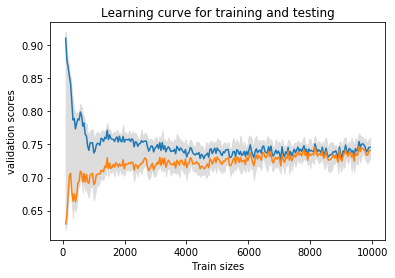

In [34]:
plot_learningCurve(AdaBoostRegressor(),X_train,y_train,train_sizes=np.linspace(0.01,1,250),cv=7,verbose=1)

[learning_curve] Training set sizes: [  99  241  384  526  669  811  954 1096 1239 1381 1524 1666 1808 1951
 2093 2236 2378 2521 2663 2806 2948 3091 3233 3376 3518 3661 3803 3946
 4088 4231 4373 4515 4658 4800 4943 5085 5228 5370 5513 5655 5798 5940
 6083 6225 6368 6510 6653 6795 6938 7080 7222 7365 7507 7650 7792 7935
 8077 8220 8362 8505 8647 8790 8932 9075 9217 9360 9502 9645 9787 9930]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed:  1.4min finished


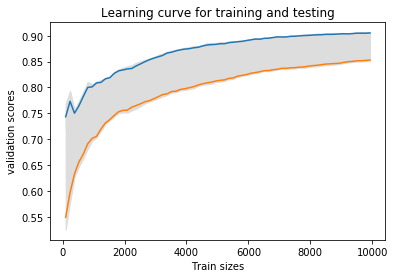

In [35]:
plot_learningCurve(KNeighborsRegressor(),X_train,y_train,train_sizes=np.linspace(0.01,1,70),cv=7,verbose=1)

[learning_curve] Training set sizes: [  99  241  384  526  669  811  954 1096 1239 1381 1524 1666 1808 1951
 2093 2236 2378 2521 2663 2806 2948 3091 3233 3376 3518 3661 3803 3946
 4088 4231 4373 4515 4658 4800 4943 5085 5228 5370 5513 5655 5798 5940
 6083 6225 6368 6510 6653 6795 6938 7080 7222 7365 7507 7650 7792 7935
 8077 8220 8362 8505 8647 8790 8932 9075 9217 9360 9502 9645 9787 9930]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 490 out of 490 | elapsed:  3.8min finished


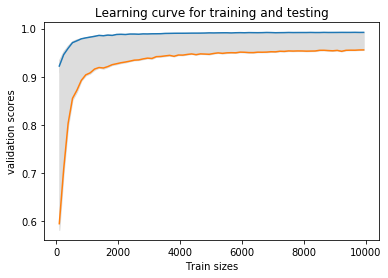

In [36]:
plot_learningCurve(BaggingRegressor(),X_train,y_train,train_sizes=np.linspace(0.01,1,70),cv=7,verbose=1)